<a href="https://colab.research.google.com/github/oanailies/online-purchase-intention-ml/blob/main/Online_Shoppers_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import nan as na
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler as sd
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score

Administrative: Număr de pagini administrative vizitate.
Administrative_Duration: Timp petrecut pe pagini administrative.
Informational: Număr de pagini informaționale vizitate.
Informational_Duration: Timp petrecut pe pagini informaționale.
ProductRelated: Număr de pagini legate de produse vizitate.
ProductRelated_Duration: Timp petrecut pe pagini legate de produse.
BounceRates: Rata de abandon.
ExitRates: Rata de ieșire.
PageValues: Valoarea paginii.
SpecialDay: Indicator al unei zile speciale.
Month: Luna vizitei.
OperatingSystems: Sistemul de operare folosit.
Browser: Browser-ul folosit.
Region: Regiunea geografică a utilizatorului.
TrafficType: Tipul de trafic care a adus utilizatorul pe site.
VisitorType: Tipul de vizitator (nou sau revenit).
Weekend: Dacă vizita a avut loc în weeken


In [ ]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.shape

(12330, 18)

In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
print('Independent Features: ',list(data.columns[:-1]))

Independent Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [ ]:
print('Target Feature:',list(data.columns[-1:]))

Target Feature: ['Revenue']


In [ ]:
num_cols=[col for col in data.select_dtypes(include=np.number)]
cat_cols=[col for col in data.select_dtypes(exclude=np.number)]

print('Numerical column:',len(num_cols),'catagorcal column:',len(cat_cols))
print('Numerical Column Names:',num_cols)
print('catagorcial Column Names:',cat_cols)

Numerical column: 14 catagorcal column: 4
Numerical Column Names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
catagorcial Column Names: ['Month', 'VisitorType', 'Weekend', 'Revenue']


Creare grafice de densitate pentru fiecare coloana numerica din setul de date, distributie date in fiecare coloana numerica, axa X reprez val variabilelor din coloanele numerice iar Y reprez densitatea probailitatilor acestor valori, adica cat de frecvent apar valorile

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

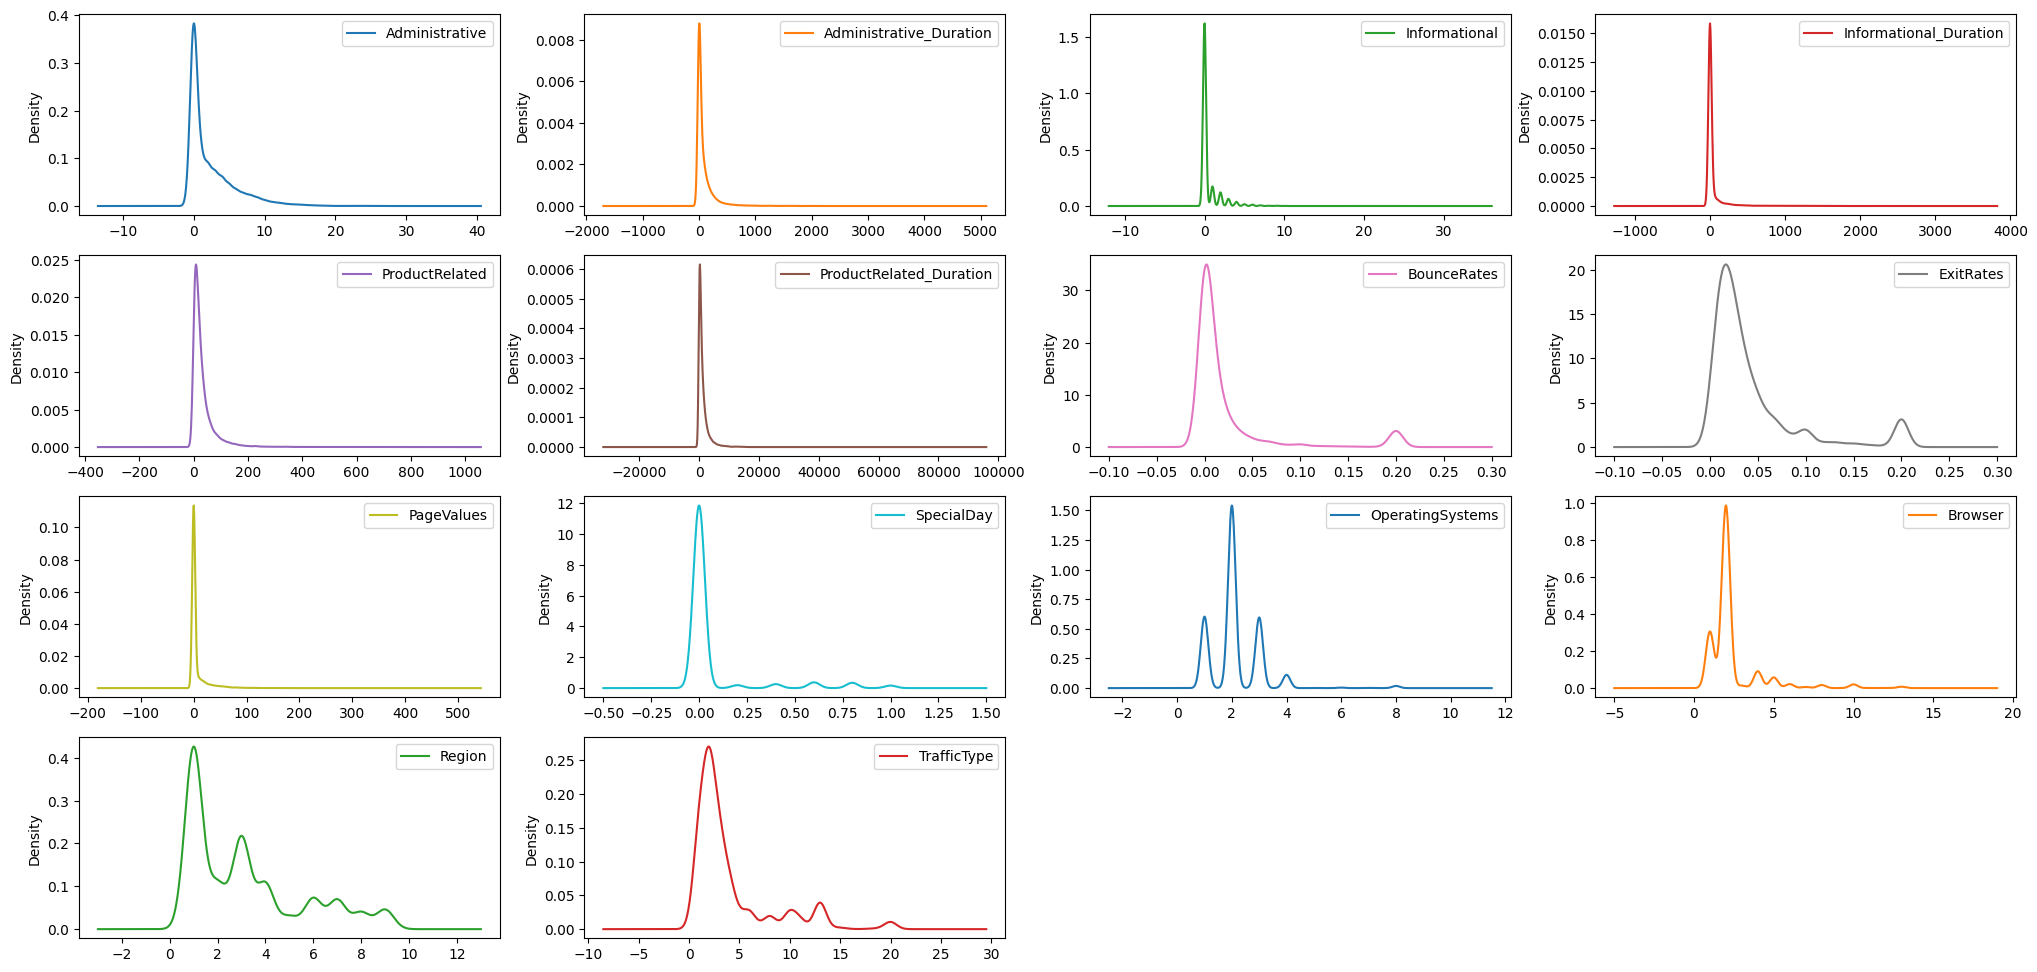

In [ ]:
data[num_cols].plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(25,12))

Creare grafice de tip box plot(Box, Whiskers, Outliers) pt fiecare coloana

Administrative                Axes(0.125,0.712609;0.168478x0.167391)
Administrative_Duration    Axes(0.327174,0.712609;0.168478x0.167391)
Informational              Axes(0.529348,0.712609;0.168478x0.167391)
Informational_Duration     Axes(0.731522,0.712609;0.168478x0.167391)
ProductRelated                Axes(0.125,0.511739;0.168478x0.167391)
ProductRelated_Duration    Axes(0.327174,0.511739;0.168478x0.167391)
BounceRates                Axes(0.529348,0.511739;0.168478x0.167391)
ExitRates                  Axes(0.731522,0.511739;0.168478x0.167391)
PageValues                     Axes(0.125,0.31087;0.168478x0.167391)
SpecialDay                  Axes(0.327174,0.31087;0.168478x0.167391)
OperatingSystems            Axes(0.529348,0.31087;0.168478x0.167391)
Browser                     Axes(0.731522,0.31087;0.168478x0.167391)
Region                            Axes(0.125,0.11;0.168478x0.167391)
TrafficType                    Axes(0.327174,0.11;0.168478x0.167391)
dtype: object

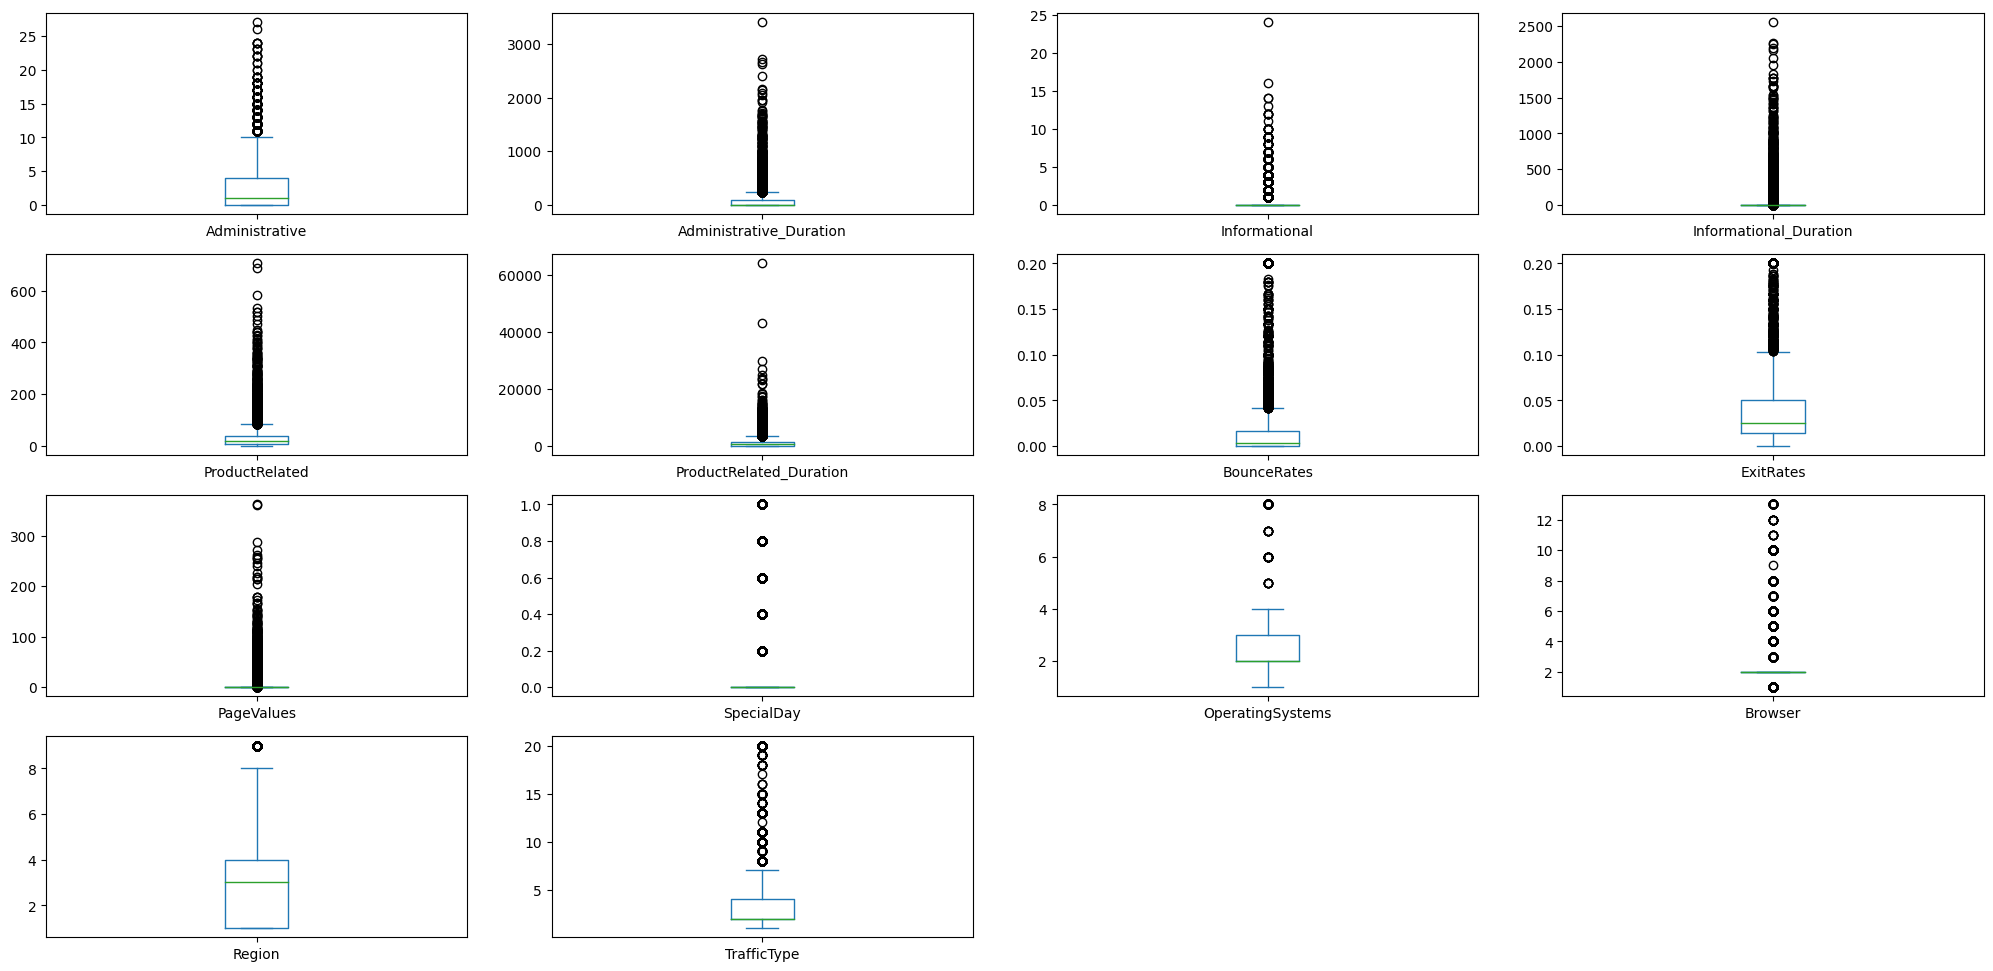

In [ ]:
data[num_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))

In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
data.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [ ]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


grafic de stacked bar plot pentru a prezenta numărul de vizite care au generat venituri și cele care nu au generat venituri în funcție de lună

<Axes: xlabel='Month'>

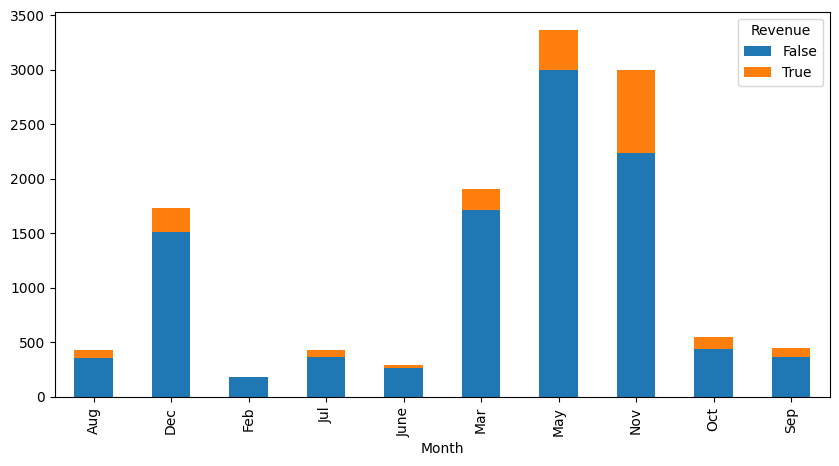

In [ ]:
data.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar',stacked=True,figsize=(10,5))

<Axes: xlabel='Weekend'>

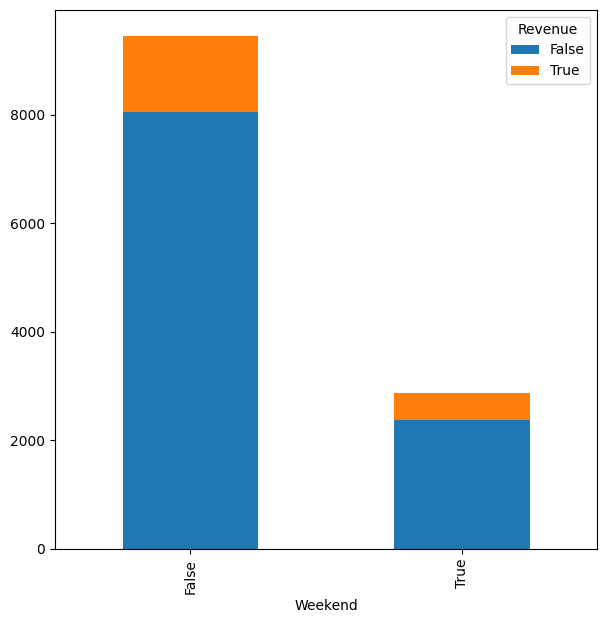

In [ ]:
data.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar',stacked=True,figsize=(7,7))

stacked bar plot pentru a prezenta numărul de vizite care au generat venituri și cele care nu au generat venituri în funcție de faptul că vizita a avut loc în weekend sau în timpul săptămânii.

grafic circular (pie chart) pentru a reprezenta distribuția tipurilor de vizitatori în setul de date

<Axes: ylabel='count'>

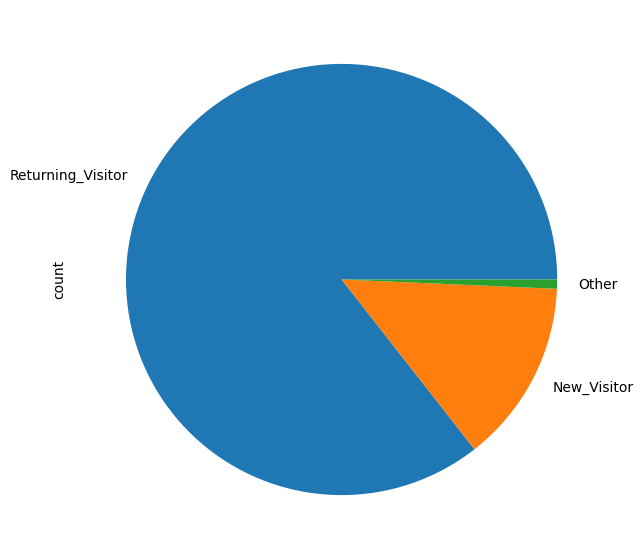

In [ ]:
data.VisitorType.value_counts().plot.pie(y='VisitorType',figsize=(7,7))

In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

un grafic de bare pentru a compara durata medie a paginilor administrative, a paginilor legate de produse și a paginilor informative pentru diferite tipuri de vizitatori

<Axes: >

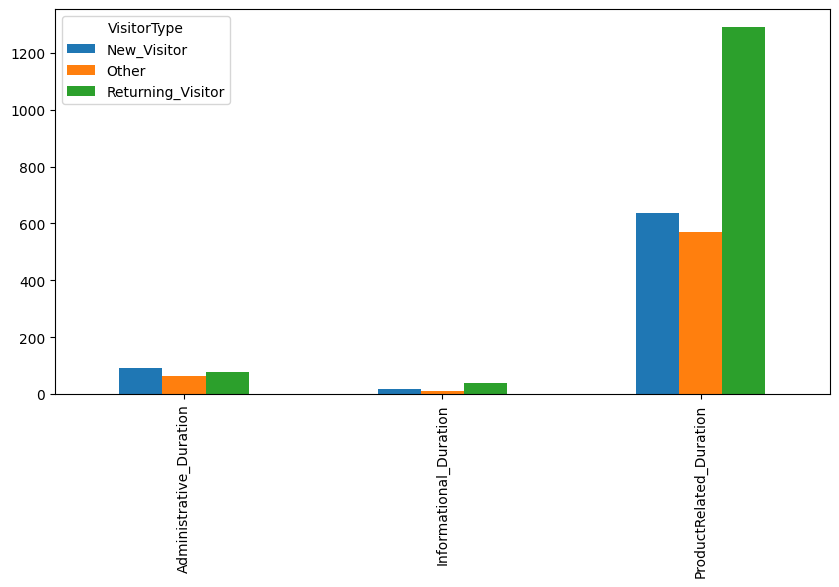

In [ ]:
admin_dpt=data[['Administrative_Duration','ProductRelated_Duration','Informational_Duration','VisitorType']]

pd.pivot_table(admin_dpt,values=['Administrative_Duration','ProductRelated_Duration','Informational_Duration'],columns=['VisitorType'],aggfunc='mean').plot(kind='bar',figsize=(10,5))

un set de histograme pentru toate coloanele numerice din setul de date

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

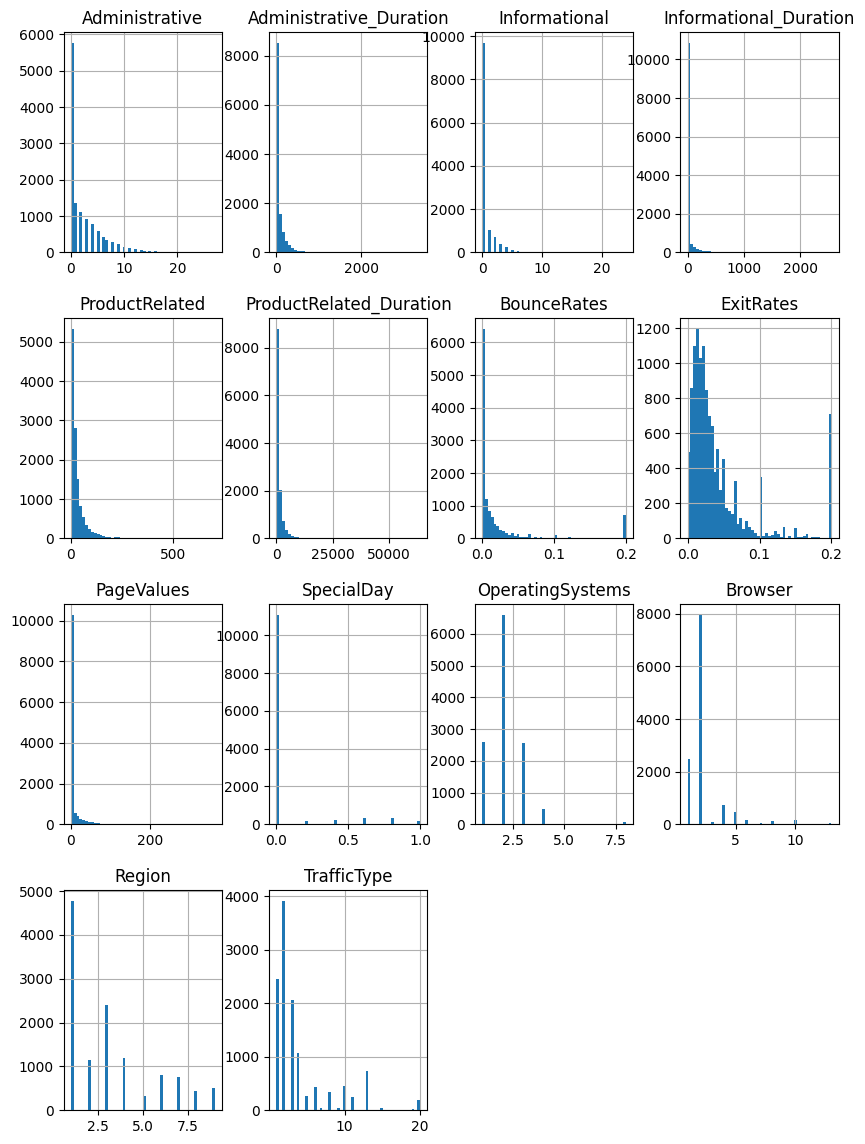

In [ ]:
data.hist(bins=50,figsize=(10,14))

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data['Month']=data['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
data['VisitorType']=data['VisitorType'].map(VisitorType)

d={True:1,False:0}
data['Weekend']=data['Weekend'].map(d)
data['Revenue']=data['Revenue'].map(d)

heatmap a corelațiilor dintre variabilele din setul de date data

<Axes: >

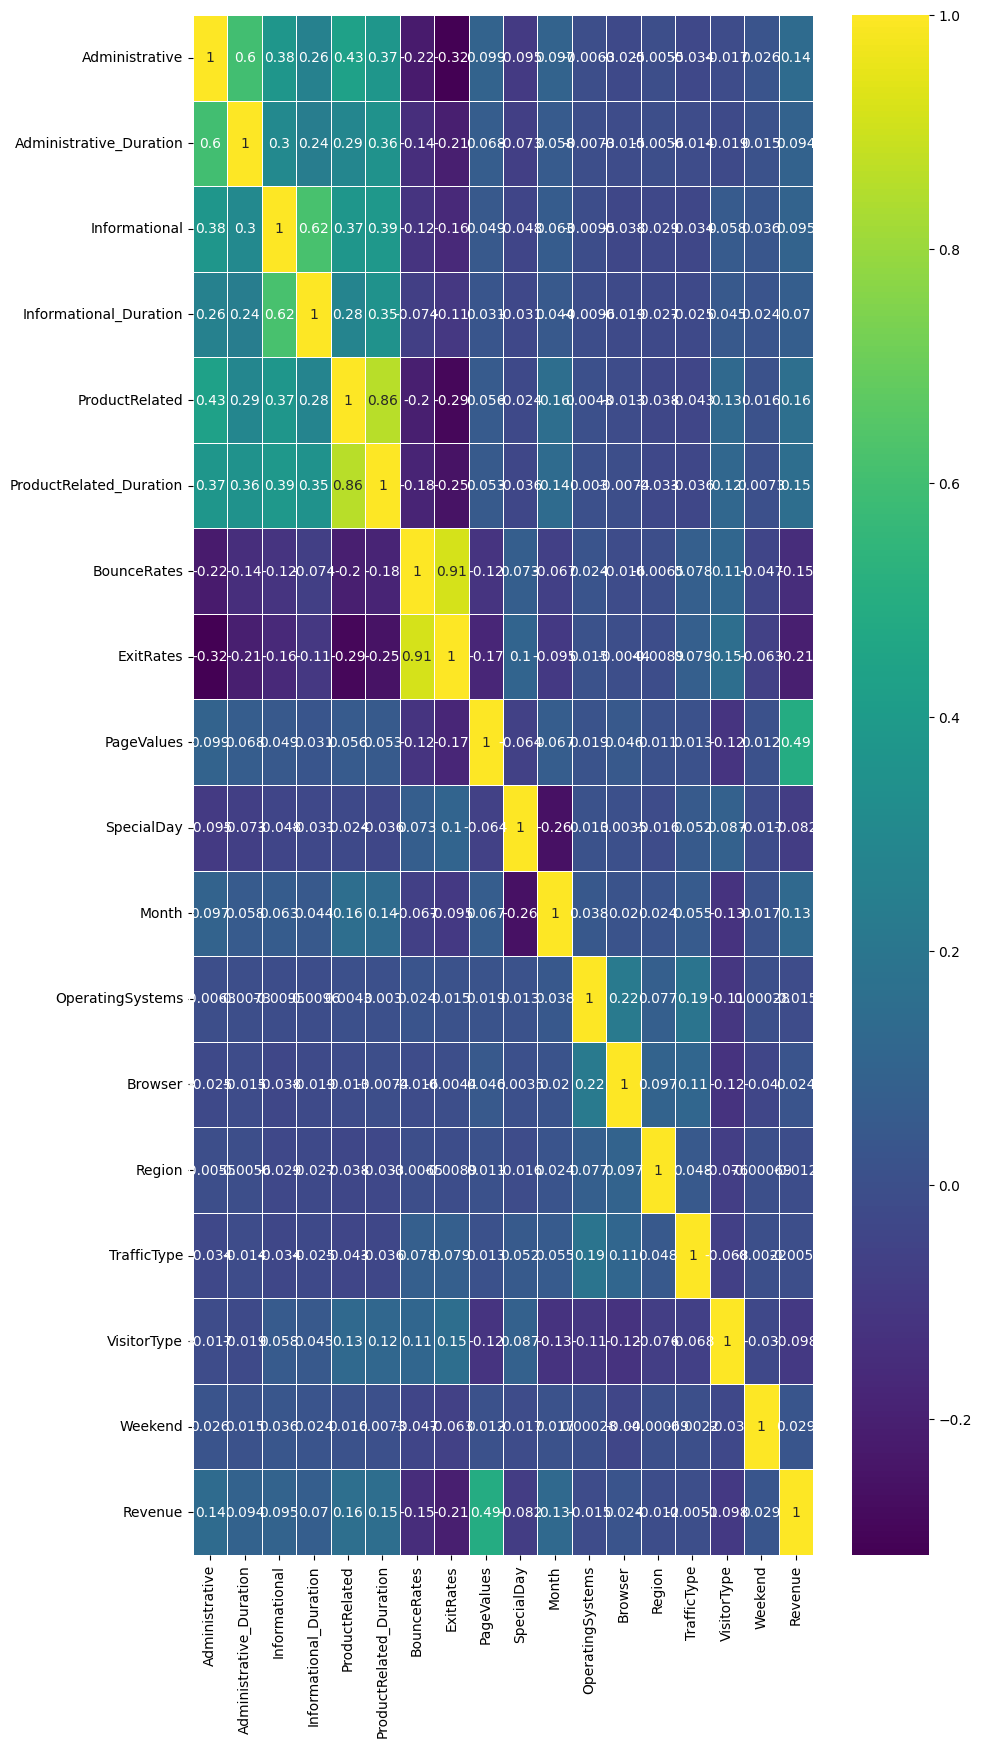

In [ ]:
plt.figure(figsize=(10,20))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
from sklearn.preprocessing import StandardScaler

SS=StandardScaler()

In [ ]:
scaled_features=SS.fit_transform(data.drop('Revenue',axis=1))

scaled_features e destinată să stocheze caracteristicile scalate ale setului de date

In [ ]:
scaled_features

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.76262903,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.26573535,
         0.40102509, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.21873304,
         0.40102509,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.72183936,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
        -2.25167844,  1.81635987]])

In [ ]:
data_feat=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,0.401025,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,0.401025,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,0.401025,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,0.401025,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,0.401025,1.816360


antrenează un model K-Nearest Neighbors (KNN) pentru a clasifica datele din setul de date 'scaled_features' în două clase pe baza variabilei 'Revenue'. Iată o explicație mai concisă:

Se divide setul de date în setul de antrenare și setul de testare.
Se antrenează un clasificator KNN cu 17 vecini pe setul de antrenare.
Se fac predicții pe setul de testare.
Se calculează matricea de confuzie pentru a evalua performanța modelului.

In [ ]:
#We need split train data and testdata. we can apply that for any one of the algo once we split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Revenue'], test_size=0.33, random_state=42)

knn=KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)

#now we are ready to take the metrics for our KNN classifier
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,pred))

[[3378   58]
 [ 446  187]]


Aceasta este o matrice de confuzie care reprezintă rezultatele evaluării performanței unui model de clasificare. În această matrice:

Elementul din colțul stânga-sus (3378) reprezintă numărul de cazuri adevărate negative (True Negatives), adică numărul de observații corect clasificate ca non-revenue.
Elementul din colțul dreapta-sus (58) reprezintă numărul de cazuri false pozitive (False Positives), adică numărul de observații incorect clasificate ca revenue.
Elementul din colțul stânga-jos (446) reprezintă numărul de cazuri false negative (False Negatives), adică numărul de observații incorect clasificate ca non-revenue.
Elementul din colțul dreapta-jos (187) reprezintă numărul de cazuri adevărate pozitive (True Positives), adică numărul de observații corect clasificate ca revenue.

 hartă termică a matricei de confuzie și afișează un raport de clasificare, care oferă o sumarizare a performanței modelului

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3436
           1       0.76      0.30      0.43       633

    accuracy                           0.88      4069
   macro avg       0.82      0.64      0.68      4069
weighted avg       0.86      0.88      0.85      4069



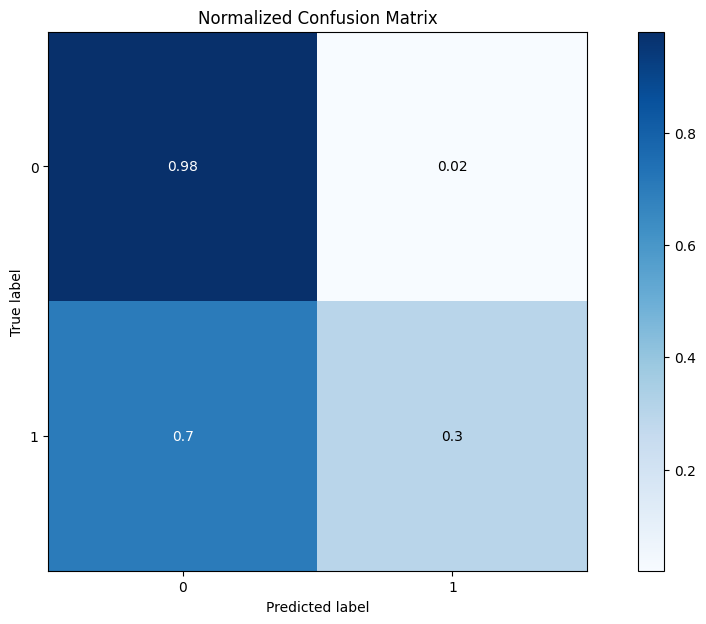

In [ ]:
# to make the report our confustion metrics using skplot
import scikitplot  as skplt

skplt.metrics.plot_confusion_matrix(y_test,pred,normalize=True)
print(classification_report(y_test,pred))

In [ ]:
!pip install scikit-plot


Bounce rate-ul este procentajul de vizitatori care părăsesc un site web fără a interacționa cu alte pagini ale acestuia. Un bounce rate mai mic indică o mai bună implicare a utilizatorilor pe site.

In [ ]:
#Now have a look at product related bounce rates of customers
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

grafic care ilustrează metoda cotului (K-elbow method) pentru determinarea numărului optim de clustere în algoritmul K-means

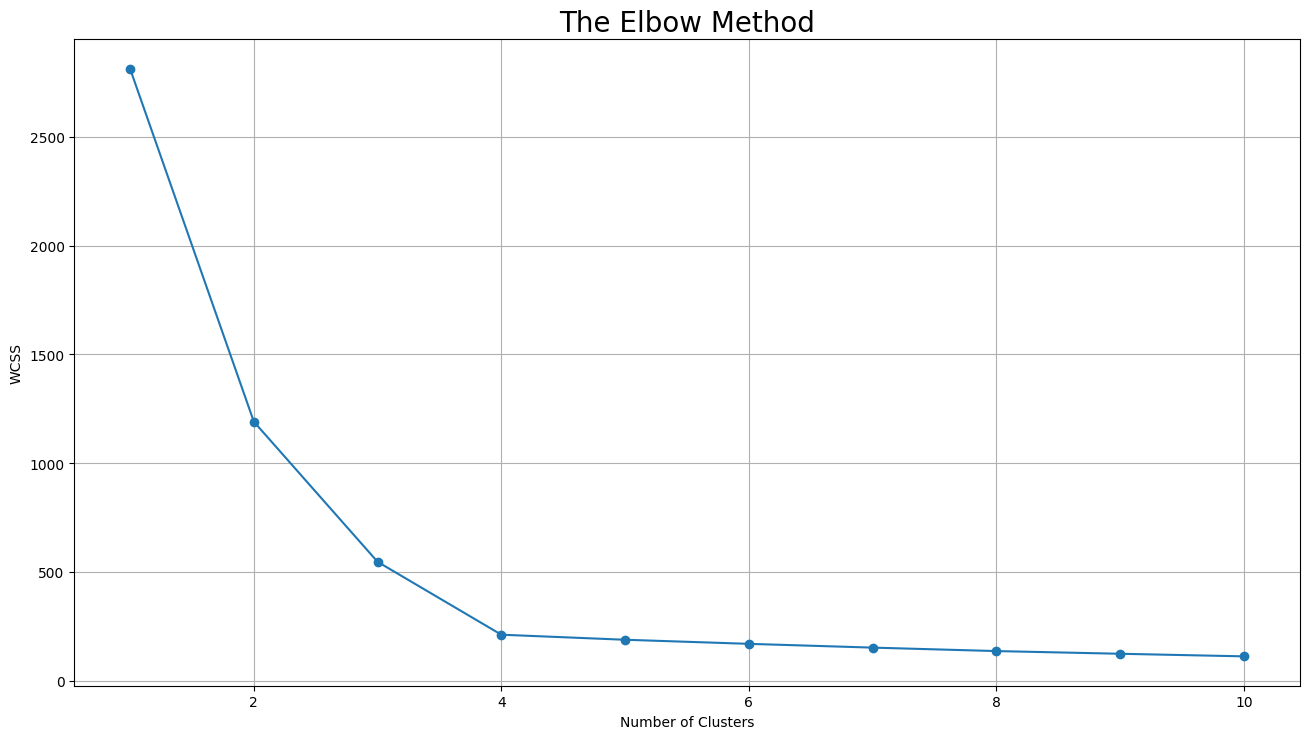

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Step 2: Generate or load your data
# For demonstration purposes, let's create some synthetic data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 3: Compute the WCSS values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 4: Plot the elbow method
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss, marker='o')
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
!pip install tensorflow

In [ ]:
df = pd.read_csv("online_shoppers_intention.csv")

In [ ]:
print(df.head())
print(df.info())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
df = df.dropna()

In [ ]:
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
df['Weekend'] = label_encoder.fit_transform(df['Weekend'])
df['Revenue'] = label_encoder.fit_transform(df['Revenue'])


In [ ]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

 împărțirea setului de date în seturi de antrenare și testare , X: Reprezintă caracteristicile (variabilele independente) ale setului de date.
y: Reprezintă variabila țintă (variabila dependentă) a setului de date.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler() #scalez datele
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model de rețea neuronală artificială (RNA). Inițializează un model secvențial, care este un tip de model în Keras.Adaugă primul strat dens (complet conectat) la model. Acesta are 64 de neuroni și funcția de activare 'relu'. Adaugă al doilea strat dens cu 32 de neuroni și funcția de activare 'relu'.Adaugă ultimul strat dens cu un singur neuron și funcția de activare 'sigmoid'. Acest strat va produce ieșirea modelului, care este o probabilitate între 0 și 1, fiind adecvată pentru o problemă de clasificare binară.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(), # alg optimizare pt ponderi retele in timpul antrenarii
              loss=BinaryCrossentropy(), #fct pierdere, calc pierdere intre etichete reale si predictiile modelului
              metrics=[Accuracy()]) #specifica metricile afisate

scatter plot pentru a vizualiza rezultatele algoritmului de clustering K-means aplicat pe datele furnizate

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


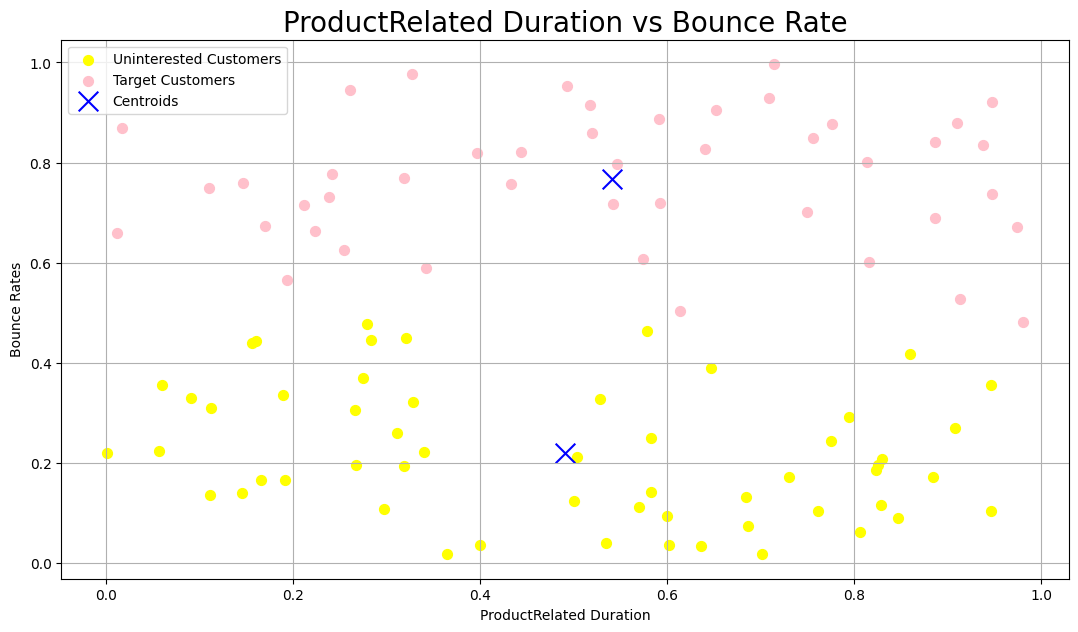

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
x = np.random.rand(100, 2)  # 100 data points with 2 features
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
y_means = kmeans.labels_
km = kmeans

# Plotting the clusters
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=50, c='yellow', label='Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=50, c='pink', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='blue', marker='x', label='Centroids')

# Title and labels
plt.title('ProductRelated Duration vs Bounce Rate', fontsize=20)
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')

# Grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

Indicele Rand ajustat este util pentru a evalua performanța algoritmului de clustering. Un scor mai mare indică o similaritate mai mare între atribuirile de clustering prezise și cele adevărate.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

# Example data (replace this with your actual data and true labels)
x = np.random.rand(100, 2)  # 100 data points with 2 features
labels_true = np.random.randint(2, size=100)  # Random true labels for the example

# Fit the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
labels_pred = kmeans.labels_

# Calculate the Adjusted Rand Index
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted Rand Index:")
print(score)


Adjusted Rand Index:
-0.003730745664238768


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Aceste două plote oferă o vizualizare a modului în care modelele de învățare automată clasifică exemplele în diferite clase și pot fi utile pentru evaluarea și analiza performanței modelului.

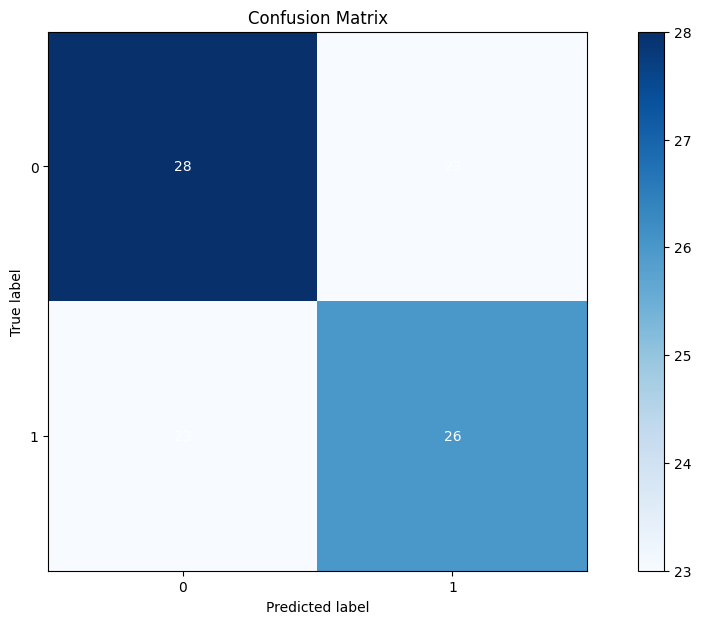

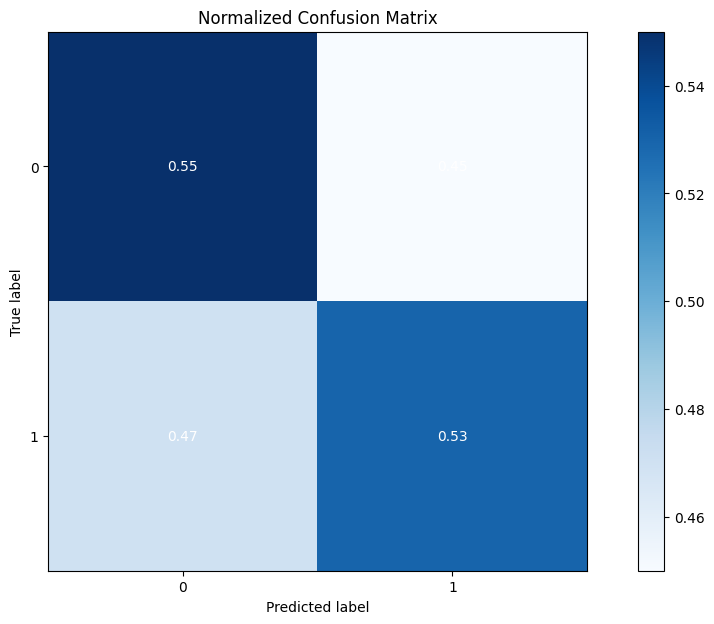

In [ ]:
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("online_shoppers_intention.csv")

# Basic data exploration
print(df.head())
print(df.info())
print(df['Revenue'].value_counts())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
df['Weekend'] = label_encoder.fit_transform(df['Weekend'])
df['Revenue'] = label_encoder.fit_transform(df['Revenue'])

# Define features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

Epoch 1/10
247/247 [==============================] - 2s 3ms/step - loss: 0.3400 - accuracy: 0.8654 - val_loss: 0.2847 - val_accuracy: 0.8839
Epoch 2/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2692 - accuracy: 0.8956 - val_loss: 0.2637 - val_accuracy: 0.8956
Epoch 3/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8987 - val_loss: 0.2563 - val_accuracy: 0.8996
Epoch 4/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.9003 - val_loss: 0.2504 - val_accuracy: 0.9057
Epoch 5/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.9031 - val_loss: 0.2524 - val_accuracy: 0.9017
Epoch 6/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2381 - accuracy: 0.9014 - val_loss: 0.2460 - val_accuracy: 0.9078
Epoch 7/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2349 - accuracy: 0.9060 - val_loss: 0.2470 - val_accuracy: 0.9047
Epoch 

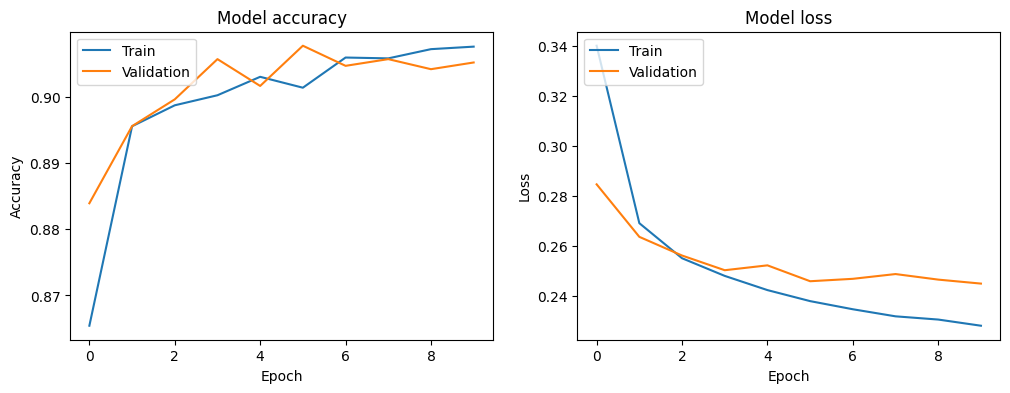

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()